In [1]:
from get_data import get_labelled_frame
from utils import display_polars
import polars as pl

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

## Importing data with labels and embeddings

In [2]:
frame = get_labelled_frame()

In [3]:
frame.collect().glimpse()

Rows: 2212
Columns: 3
$ sentences        <str> 'Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEMENT 23.4.2007 Ahlstrom Corporation will publish its first quarter financial results 2007 on Friday , April 27 , 2007 approximately at 8.30 a.m. Finnish time .', 'According to Gallup Food and Farm Facts , beef consumption totaled 99mn kilos in Finland in 2007 .', "Marimekko Group 's full-year net sales are estimated to increase by about 10 % .", 'The stock rose for a third day on Tuesday bringing its three-day rise to GBX10 .50 or 1.8 % .', 'Each year the dividend is deducted from the subscription price .', 'Finnish Sampo-Rosenlew manufactures approximately seven forest machines monthly , and about half of machines are exported .', '10 February 2011 - Finnish media company Sanoma Oyj HEL : SAA1V said yesterday its 2010 net profit almost tripled to EUR297 .3 m from EUR107 .1 m for 2009 and announced a proposal for a raised payout .', 'The Financial Statements and Interim Reports will be released 

## Adding K-Means clustering

In [4]:
kmeans = KMeans(n_clusters=3)
frame = frame.with_columns(
    pl.Series(
        name= 'clusters',
        values= kmeans.fit_predict(frame.select('embeddings').collect().to_series().to_list())
    )
)

In [5]:
frame.collect().glimpse()

Rows: 2212
Columns: 4
$ sentences        <str> 'Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEMENT 23.4.2007 Ahlstrom Corporation will publish its first quarter financial results 2007 on Friday , April 27 , 2007 approximately at 8.30 a.m. Finnish time .', 'According to Gallup Food and Farm Facts , beef consumption totaled 99mn kilos in Finland in 2007 .', "Marimekko Group 's full-year net sales are estimated to increase by about 10 % .", 'The stock rose for a third day on Tuesday bringing its three-day rise to GBX10 .50 or 1.8 % .', 'Each year the dividend is deducted from the subscription price .', 'Finnish Sampo-Rosenlew manufactures approximately seven forest machines monthly , and about half of machines are exported .', '10 February 2011 - Finnish media company Sanoma Oyj HEL : SAA1V said yesterday its 2010 net profit almost tripled to EUR297 .3 m from EUR107 .1 m for 2009 and announced a proposal for a raised payout .', 'The Financial Statements and Interim Reports will be released 

## Dimension reduction

In [6]:
pca = KernelPCA(n_components=3)

frame = frame.with_columns(
    pl.Series(
        name= "x",
        values= pca.fit_transform(frame.select('embeddings').collect().to_series().to_list())[:,0]
    ),
        pl.Series(
        name= "y",
        values= pca.fit_transform(frame.select('embeddings').collect().to_series().to_list())[:,1]
    ),
        pl.Series(
        name= "z",
        values= pca.fit_transform(frame.select('embeddings').collect().to_series().to_list())[:,2]
    ),

)

In [56]:
frame.collect().head()

sentences,label,embeddings,clusters,x,y,z
str,str,list[f64],i32,f64,f64,f64
"""Ahlstrom Corpo…","""neutral""","[-0.051819, 0.049774, … 0.017914]",2,-0.000711,0.233709,-0.126559
"""According to G…","""neutral""","[-0.06543, -0.000528, … 0.014442]",2,-0.018569,0.114563,0.047962
"""Marimekko Grou…","""positive""","[-0.039581, 0.002014, … 0.044495]",2,0.060631,0.053616,0.014414
"""The stock rose…","""positive""","[-0.039917, 0.013153, … 0.035614]",1,-0.00706,-0.08601,-0.10415
"""Each year the …","""neutral""","[-0.033966, 0.002663, … 0.016312]",1,0.029632,-0.120541,-0.144753


## Plots

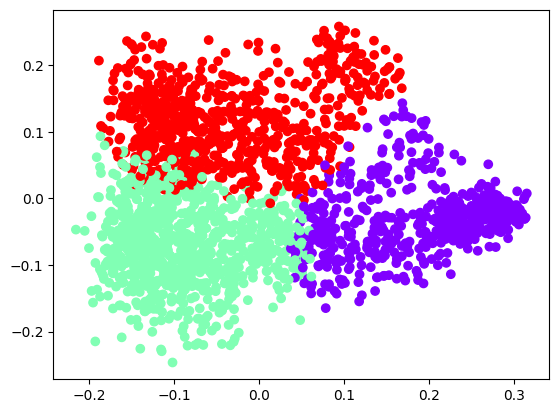

In [55]:
data = frame.collect()
plt.scatter(data['x'], data['y'], c=data['clusters'], cmap='rainbow')

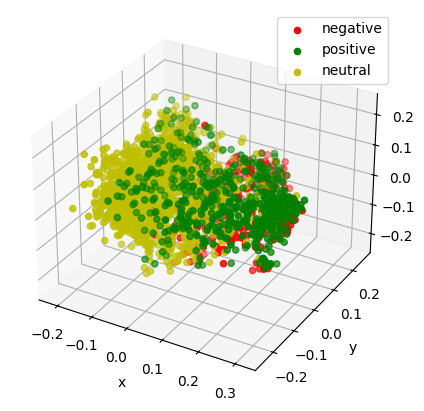

In [50]:
# Create a 3D scatter plot with 3 colors based on the 'category' variable
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(111, projection='3d')
colors = {'positive': 'g', 'neutral': 'y', 'negative': 'r'}
for cat in data['label'].unique():
    d = data.filter(pl.col('label').eq(cat))
    ax.scatter3D(d['x'], d['y'], d['z'], c=colors[cat], label=cat)

# Set the axis labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

# Show the plot
plt.show()

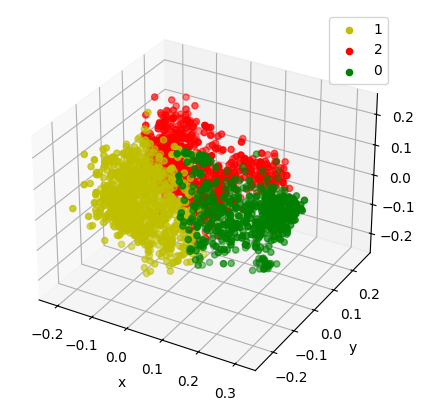

In [52]:
# Create a 3D scatter plot with 3 colors based on the 'category' variable
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(111, projection='3d')
colors = {'0': 'g', '1': 'y', '2': 'r'}
for cat in data['clusters'].cast(pl.String).unique():
    d = data.filter(pl.col('clusters').cast(pl.String).eq(cat))
    ax.scatter3D(d['x'], d['y'], d['z'], c=colors[cat], label=cat)

# Set the axis labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

# Show the plot
plt.show()